In [1]:
#//----------------------------
#//LIBRARIES
    #Math
import math
    #Numeric Python
import numpy as np
    #Pandas (dataframes)
import pandas as pd
    #datetime for fate manipulation
from datetime import date, datetime, timedelta  
    #Regex for advanced string matching
import re
    #for time related stuff
import time 
    #json library
import json
    #Analyst tools
import sys
sys.path.append('../')
from analysts_tools.growth import *
    #Procurement tools
from procurement_lib import send_slack_notification
from procurement_lib import redash
from analysts_tools.redash_methods import *
from analystcommunity.read_connection_data_warehouse import run_read_dwd_query

import random
import time
import datetime

import seaborn as sns
import matplotlib.pyplot as plt


from procurement_lib import GoogleSheet

In [3]:
df_gtin = GoogleSheet("1TBAwmxAoqg6FX79d7wLu3DVtIiOb6gRfkN5fMA_tLNc")
df_gtin = df_gtin.get_as_dataframe('Hoja 1')

In [4]:
query = """
SELECT DISTINCT
    CASE 
    WHEN state = 'Grande SP' THEN 'SPO'
    WHEN state = 'SP Interior' THEN 'VCP'
    WHEN state = 'MG' THEN 'BHZ'
    WHEN state = 'PR' THEN 'CWB'
    ELSE 'NA' END AS site_code,
    i.price_date AS quotation_date,
    CAST(REPLACE(i.price_date, '-', '') AS INTEGER) AS dim_quotation_date,
    i.store_type || ' - ' || i.store_identifier AS competitor_name,
    gtin,
    AVG(COALESCE(
        REPLACE(NULLIF(i.regular_price::VARCHAR, ''), ' ', '0')::FLOAT,
        REPLACE(NULLIF(i.price_paid::VARCHAR, ''), ' ', '0')::FLOAT,
        REPLACE(NULLIF(i.price_paid_per_standard_unit_of_measure::VARCHAR, ''), ' ', '0')::FLOAT,
        0.0
    )) AS price
    
FROM lnd_ops.infoprice_product_scraper i
WHERE store_type IN ('Atacado')
 AND gtin IN (7898247780297,7896036090244,7896569405515,7896036090855,7896066767284,7896267000135,7898247780006,7896122305207,7896084700515,7898215151708,7896045503414,7896935810011,7896508200041,7898922071023,7896006751137,7898659280620,7896256601848,7891149011001,7894900010015,7898080640611,7896116900029,7898171400049,7898184631652,7896508200034,7896894900013,7896419720386,7891149010509,7896070800090,7898921567411,7896276060021,78936683,7894900027013,7898925834014,7898312042121,7896045506934,7898247780075,7896349600017,7898903113025,7898312044323,7896045506248,7898081291256,7898171400209,7896105800361,7896267004102,7896419431053,7894900700015,7896444118158,7898312041278,7898171400025,7896569405003,7891022638004,7896036097991,7891149200504,7797906054499,7896105800811,7898903113063,7896116900661,7898949924128,7896122300059,7896444198358,7898603780015,78908901,7896349600185,7896045506873,7898950286178,7896427701391,7894900011609,7896444118219,7896419436027,7896050600276,7898208480754,7894904009749,7898967047229,7894904014569,7897798800218,7892840812423,7896275900601,7896036097885,7896089012019,7896353301207,7898949924180,7896412819247,7891910000197,7896508200010,7898949924074,7896051111016,7896022205720,7898386200083,7898345781462,7891991000826,7898276600108,7896569405508,7896110192918,7896045512317,7896006744115,7896116900647,7898019060305,7898907037211,7896005310090,7896098900208,7898921567121,7891991014908,7898024450115,7891991295017,7896102501797,7896235100027,7892020001388,7896045505340,7898215151883,7896478800043,7896005286579,7896005800546,7898950286260,7898215152002,7896444198310,7896444110916,7896006751151,7896070800014,7896032501010,7897798800232,7896419716280,7896248100038,7896419719656,7896434921027,7898921567497,7891032011156,7898215151784,7898264360199,7891515220983,7896022207373,7797906000526,7898039680774,7896045102440,7896052604975,7891991001342,7897395020101,7896006751113,7898215152026,7896982102435,7896021800049,7891515593865,7898312042657,7896235100218,7896021300044,7896267000128,7898386200014,7891149103102,7896036092927,7896248101530,7896045102396,7896275910112,7896010006360,7896006703112,7896186300118,7896027920017,7897395040307,7896070800137,7896326100219,7896070800113,7896052603497,7896105800217,7891991000727,7896029310014,7898312045368,7896015910006,7896104992937,7798304851703,7894900660333,7896089011357,7896275940201,7896527700485,7891022242003,8410179099972,7892020220628,7898288160256,7896935810028,7899566300425,7891032013105,7896015910013,7896434921232,7896025802995,7891149201006,7896062400437,7896005310120,7896015912505,7897387103638,7896057800556,7896005310113,7896267004201,7894900660319,7897798800409,7891527000795,7896275900618,7891080000157,7896030521362,7896275940218,7896021314720,7896478800012,7896005302088,7896527700751,7898215152354,78905351,7897395020217,7896084700492,7893000526044,611269991000,7896110100043,7892020200156,7897387100118,7896025802674,7898215152033,7896045506040,7896419431015,7892020000992,7896527702670,7396232115673,7896102502166,7896005310168,78905498,7898931140550,7896098900253,7896186302884,7892020200217,7892020220505,7896005801529,7898902299058,7894900030013,7896412800856,7896935830033,7896275920906,7896275940829,7896013102045,7896444111159,7798304851215,7894904578252,7896057800228,7894900681017,7896581301734,7894904008018,7894904015108,7896419720263,7896607100044,7896050200124,7891018001393,7891991294942,7898466107998,7891080000119,7896419720447,7896005800010,7896581300317,7897387105441,7897798800249,7898537400683,7896102501872,8711571072519,7891018427643,7894904009282,7896444110053,7898215152347,7896894900037,7892020220529,7894900530001,7897387106080,7896025803121,7894904013180,7896508200027,7896053600013,7898902971015,78933873,7891022100372,7896036096680,7896540904464,7896581322203,7896036097830,7896022200756,7897387101139,7896102501650,7891991010825,7898915949209,7894904572465,7898039680767,7896030511035,7896036094242,7898039680613,7896084700522,7896248100472,7896444199157,7896569400848,7891022101003,7896444199256,7896006795100,7891018001386,7894904578153,7891032014621,7892020001456,7896419701637,7896005801512,7898907037037,7896005800027,7897798800324,7894904255436,7897534800212,7896419715566,7898167881029,7898537400621,7898934008550,7898959250415,7896205788040,7893000079298,8936044094731,7896025805170,7891515410315,7896030511028,7896025802681,7896353301542,7896021314256,7896098905906,7896045102501,7896273900306,7896275960087,7896048210036,7896002100014,7891149108718,7896444196255,7896036097823,7892840812850,7898416520778,7898624690478,7893000394209,7898641040379,7898934008215,7898950286185,7894900531008,7898276600122,7896084700508,7896005286524,7896025803145,7896061915208,7896057800174,7898949924388,7894904018246,7896104999905,7896275920753,7893000444232,7896419720157,7891021006125,7894900701517,7894900660289,7896540900831,7898184631713,7896022205737,7898288160171,7898902299805,7898312040851,7898345783619,7896027910018,7896098904664,7898625902471,7898915414134,7896053600044,7896098905203,7896116900623,7893000024014,7896030520808,7894904015849,7896527702663,7892020001180,7891991015462,7896005286593,7892141956093,7898907037013,7893000018761,7898707750013,7897534801288,7894904005550,7896030501012,7896062400420,7896914011217,7896084701659,7891991000840,7898625900804,7896412800092,7896005803721,7896527700782,7897518409042,7896006793687,7897534801851,7891018427582,7898302290372,7898416521157,7896102500608,7898312041254,7896098909805,7896524726457,7896490288805,7898537401147,7899566301583,7896434921133,7896025803015,7896025802872,2145300016004,7894904230624,7891991011723,7894900010398,7894904018161,7894904577859,7896434920723,7894900660401,7896030502019,7896036000083,7896062400406,7896090300259,7896045102495,7891021005043,7896275940744,7896412800122,7896419724582,7898930142722,7896054901799,7891031409756,7896022205744,7891031412602,7898181470117,7896098904688,7896532100010,7896005202074,7891991002646,7896540900305,7896540900633,7894904006304,7896540902408,7897534800236,7898041930010,7896527702618,7892141955737,7894904007059,7896894900068,7898167887984,7898416529849,7894900660265,7892020200620,7908344802300,7896036098264,7891032011323,7896022205782,7898907037204,7896070802209,7896062400253,7898312043722,7892020200194,7894904197699,7891030300306,7892840800079,7896412800108,7891527962376,7891031409428,7896444110114,7896232115680,7896527700331,7898181470032,7898181470520,7898181470018,7896027910025,7896685200063,7896527701581,7896006762027,7898921567060,7896419720010,7891018427599,7891018427650,7896747800668,7891000107843,7896353300521,7897387103560,7897387103645,7891032012207,7891515550097,7894904929658,7898039680729,7898167887663,7896804602518,7896009301049,7896057800525,7896524726150,7898312045023,7898537402472,7898537430068,7898950515018,7891032011057,7898416527548,7898416521164,7896434920778,7896061920202,7896006751250,7896186300507,7896186302945,7896527702656,7896015973308,7898312041247,7896275950316,7898907037044,7891991303309,7894900700398,7899566300043,7896015976804,7894904268726,7896005310649,7896030519468,7896036097618,7896013142065,7896054907012,7790199604068,7896102502428,7896104995129,7891991015493,7896098905258,7896036000816,7896419719649,7896054901812,7896527700218,7896540902156,7891527044942,7896747800644,7897387101221,7897387103621,7898910095185,7896036096437,7891000253427,7898921567305,8410179100036,7897387105427,7897518409028,7898167881197,7891000248775,7896741609960,7898181470285,7896005232705,7896412852268,7897232236061,7898537400607,7898537401796,7896006750734,7896036097861,7896025803008,7896104992371,7899566302429,7896030518027,7891515474737,7896005310182,7898952156097,9002490100490,7896894900075,7893000521322,7898416529856,7891991014762,7896116900197,7896005286555,7896102000313,7891030300177,7896104991961,7893218003603,7899566304485,7894904955800,7896005212721,7898911082177,7896021314744,7896021300433,7896478800074,7896005302255,7896036096604,7896036099216,7896036099346,7896054907101,7896054909252,7898215151807,7891527064728,7891021006934,7896054909368,7891022080049,7896021810055,7896015910600,7896015976095,7896061915444,7896022200534,7896061920318,7896430500011,7896054901805,7896478800081,7898181470094,7896275921095,7896540902255,7896540904457,7897387103553,7896894900082,7896005800140,7891910030347,7898542029923,7894904230648,7891000460214,7897387104505,7896419720003,7891022640007,7896098900222,7896090100101,7896070800199,7896070800793,7897534848252,7896005281710,7898039680255,7894904270002,7896116900784,7896490288867,7896102504361,7896005310137,7898039680712,7898167881128,7896110100814,7898302284432,7898312042640,7896894900198,7898903594527,7898909698007,7898915415544,7898921818070,7898934008222,7896419714224,7898950284372,7896490288775,7896005275399,7896412800863,7896275960520,7896005222638,7896030518157,7622210566362,7622210573377,7896048284778,7896036094396,7896275900977,7791688888204,7891008367027,7891008123999,7896547501154,7898707750006,7897534826328,7896098900239,7894900093001,7897686300332,7891032011248,7891032014324,7891527000535,7891527069334,7896021300419,7892020001395,7896102509496,7898184630198,7891030300207,7894904014293,7894904577941,7895800400142,7894904003495,7896005310656,7891050000903,7896013102311,7895800400166,8410179100050,7891021006071,7896005806012,7896015976002,7896036096925,7896036099230,7896036099339,7896036099735,7896054900044,7896412803048,7896273900047,7896015976217,7896057800235,7896005803714,7898181470261,7896232115697,7896022200572,7896104992364,7891527064704,7896273900122,7896036097892,7896054907104,7891031405604,7896104996393,7896275981273,7896273900948,7896527700805,7896419715047,7896292321434,7891959014612,7896419717560,7898931140529,7896444196354,7896547500089,7891910030354,7896444196453,7891991295277,7898367983790,7891991297424,7896527700614,7898966869174,7894904015221,7896098903520,7896540900558,7896540901135,7896581352057,7896116900685,7892020200231,7894900593709,7896747800132,7896116900937,7896102583182,7896894900204,7897387101153,7897387105434,7896025802919,7897248600115,7897518400810,7891022861112,7896000555359,7897534854161,7897750783542,7896524726518,7896224836098,7897798800201,7898039680323,7891991010481,7898167881074,7898416527623,7896036096673,7898167883153,7896005279489,7898312040493,7896025801172,7898416520785,7893000973817,7896419722663,7896005281697,7898537401819,7896025803091,7896105900153,7898960283938,7898039680835,7893000106420,7896419714064,7896057800433,7893218000473,7897147211054,7898921567404,7898907037020,7622210812636,7891022860535,7896547501277,7891030300290,7898921567329,7891032011330,7897534800595,7897534822108,7897534832695,7897534800465,7897534800434,7891080013423,7891515532352,7896062400468,7894900030396,7894900050394,7892020000886,7892020200644,7898911082061,7894904034543,7897534805309,7894904208913,7896021302994,7896021314232,7896021300655,7898911082160,7894904271498,7891515979355,7896025803206,7896025802889,7896036097458,7896036090909,7898911082894,7894904706983,7895800400159,7896062400369,7896005800362,7896275900595,7896015922009,7891030300139,7894900681178,7896036096628,7897534821514,7896036096932,7896036096949,7896036096956,7896419720270,7896036097595,7896048284822,7891021005067,7896054904745,7896054907036,7891527962253,7896054909214,7896054909276,7896057800617,7891022860740,7896057801010,7896527700768,7896062400499,7896015910037,7896104993637,7896021810017,7896021800209,7896273908289,7896273900429,7896273900023,7896102503708,7896273900320,7896232115703,7896021822157,7896122301148,7896036090879,7896036093467,7896248100014,7896273900559,7896054905384,7896292321465,7898902299867,7896353300026,7898360980055,7896504306808,7896527700775,7896527702007,7896527702595,7893500036012,7896009301131,7896527702601,7896594903017,7896594972679,7898937864948,7896540900626,7896540900671,7897518409387,7896005800386,7897232228141,7898367980010,7898915949964,7895800400227,7896524727508,7896527701642,7896527701611,7896524711200,7896102500493,7897387101238,7896102502558,7896070800106,7898416521270,7896005275832,7897387102402,7897387102815,7896061934285,7894900583700,7896098900802,7897518400742,7897518409004,7896005277317,7896205788156,7897534801240,7897534826588,7896248101073,7896116902078,7896025802858,7896025800052,7896102583205,7896005310106,7898651640149,7896000530066,7896000594068,7896000594099,7898921567848,7897798800287,7898039680118,7898039680149,7898039680705,7898044351713,7898167887991,7898167889032,7898416521232,7896048200051,7896057800198,7898167889605,7896273100263,7898312041537,7898360980314,7898416520761,7898466108018,7898505140207,7898641041567,7898651640071,7898902971022,7898910095208,7898911082887,7898921567190,7898922405583,7896524705858,7898937864788,7898952156202,7894904769889,7896104994139,7899566302412,7896419722656,7899567248924,7898937864115,7891031405345,7899567292569,7898651640064,7898651640132,7898416529610,7908344801938,7908349900070,7908349900094,7896524700389,7896353301535,7908349900124,7908349900179,7896419713852,7896036098851,7898416520808,1789117243389,7891031116944,7622210566393,7896019602006,7891095154074,7622210570079,7895800400180,7622210573315,7891000003299,7622210573346,7622210857255,7622210858245,7702458264166,7791688000064,7891000248836,7896547501161,7891000312926,7897534819399,7891000312971,7897534800458,7897534805828,7896098904770,7891000313022,7891000336380,7896102502008,7891008198027,7894900093025,7891008209020,7891008273502,7891021006927,7891022860832,7891030002033,7891030300191,7891031116920,7891032011224,7891032012504,7891032013952,7891032014287,7891032014690,7897534800410,7891032015215,7897534859555,7891032015918,7897534800960,7891022860580,7896098902547,7896021303809,7891032015994,7891080007682,7896292343702,7891030300276,7891080013720,7891080106019,7891080151330,7891149108282,7896036099452,7896062400475,7896102501896,7896102502145,7896036097878,7891172151125,7891172433382,7896102503715,7891172433801,7891172421174,7896301802923,7891965120154,7891965120253,7891965120345,7896581307255,7896581353399,7891965120543,7891965120642,7898184630327,7896122301308,7896029312018,7891965121397,7891022471007,7894904691005,7891965122219,7891965129799,7896048258038,7896048258014,7896048255013,7891965129812,7897534801752,7896527702427,7891965129898,7891965132195,7891965159888,7891965220083,7898181475051,7891965220427,7891965410217,7891965431021,7891991295086,7891991298674,7892840813505,7894474003062,7894474200843,7894900094008,7894904018406,7894904247806,7894904264643,7894904273294,7898930141572,7896102500448,7898930142470,7894904578160,7896273900337,7895800116258,7895800116500,7896000594129,7894904575350,7896000595737,7896000595775,7896000596390,7896000596598,7896005806180,7896005808733,7896015930608,7896025804883,7896036000144,7898930142715,7894904578245,7896036000151,7898181470070,7898181470537,7896036000960,7896036094686,7896275949921,7896098904336,7896036094709,7898910095055,7896036096994,7896006711155,7893500018452,7896009301209,7896009301216,7790070225580,7896036097601,7896894900235,7896051115229,7622210878946,7898937864955,7898921567220,7896036097625,7896005809518,7898215157861,7898955705049,7898692300316,7896036099223,7896036099353,7896607100174,7896005801819,7896005800157,7896005800829,7896045111398,7896045103003,7891000251539,7896041173758,7896048284037,7896051128137,7896054900020,7896054906718,7896054906732,7896054906756,7896054906978,7896054906985,7896054906992,7891991306324,7891991295055,7896054907005,7891991303347,7898167887557,7895800400173,7896054907111,7896054908910,7891000464915,7896054909375,7896057800143,7891000321669,7896057800181,7896061931383,7896070800052,7891000092613,7891008114126,7896070800151,7896070802193,7896000595744,7896000596406,7896084701635,7896089407655,7896090300044,7896090300167,7896090300235,7896090301157,7896098904787,7896098904800,7896105800026,7896514702010,7896514702034,7896229600168,7896229600175,7896229600243,7894904268238,7896434921201,7891000538500,7896051164128,7896051114024,7896292302693,7891022860733,7896098903506,7896098903629,7896527700379,7896527700560,7896527700577,7896527700584,7896527700355,7896098903698,7896098903308,7896524711255,7896051145219,7891022851021,7896292324473,7896292330467,7896430502312,7896412852275,7896504305061,7896504307232,7898416521072,7898416521089,7898416521096,7898416521119,7896527700335,7896527700904,7896005212714,7896527700911,7896005212615,7898063767045,7896527701826,7891172151323,7896061973055,7896540900312,7894900563702,7896025803688,7898946867077,7896540900381,7896540900541,7896292300460,7897232221838,7898215157786,7896051130154,7897232229704,7898416522086,7897232229728,7896524740507,7897387101122,7898966869143,7896527702489,7896005286531,7896205788033,7896005275382,7896205788095,7896005286609,7896205788217,7898946867107,7897387101436,7897518400797,7898416522093,7898416521300,7896025803701,7898416524639,7896025800069,7898937864078,7896036098813,7896025800250,7896025805484,7897518400827,7896025805071,7896025805040,7896025805361,7896025801196,7897518400872,7896025804074,7896025802865,7898416524547,7897518403538,7896025803695,7898946867084,7897518409011,7896025803718,7898651640712,7898651640279,7898651640026,7898651640330,7898651640040,7898651640088,7898651640293,7896005302040,7896000530264,7896000597267,7896000594044,7896000597281,7896000530363,7896000593863,7896000593702,7896000594051,7896000598356,7896000597274,7896000597670,7897518409110,7896000593719,7896000593924,7896000597250,7896000530325,7896000593900,7897534801929,7898966869235,7897686300202,7896105900221,7896105900351,7896105900160,7897686300509,7897518400735,7897518400766,7897518400841,7898039680903,7898044351744,7898044355070,7898966869082,7898044356015,7898966869013,7896098909744,7898167883016,7896430500059,7896110195162,7896110195216,7898167887502,7896102500530,7896000597854,7896000597878,7896000597847,7898167887731,7896000557056,7896000554369,7896000559265,7896000556066,7898167887854,7898416524851,7896098909935,7898303210140,7893218002576,7898063767038,7896098904671,7898312042930,7892141955874,7898952156035,7898325581242,7898416520051,7898416520082,7898416520181,7898416529764,7898416529917,7898505142621,7898505142645,7898505142652,7898537402496,7898537403141,7898537403158,7898608572882,7898641049433,7898651640033,7898651640354,7898651640361,7896547501178,7898902299027,7896524705063,7896527700386,7898902299584,7896524705551,7898910095024,7898416522055,7898910095048,7898910095062,7898910095369,7898910095376,7898911082078,7898911082290,7898911082719,7898911082788,7898911082917,7898917671153,7898918339151,7898921818049,7898921818254,7898921818841,7898922405580,7893000387096,7898922405750,7898922405767,7898922405774,7896524740408,7898934113575,7898950284389,7894904271481,7898950284396,7898952156103,7898952156189,7898952156257,7899567248894,7899567292552,7893000913912,7897232235019,7908349900056,7908349900117,7908349900285,7896524700372)
GROUP BY 1,2,3,4,5
""".format(skus=tuple(df_gtin.GTIN.unique().tolist()))

df = read_connection_data_warehouse.run_read_prod_query(query)

df['quotation_date'] = pd.to_datetime(df['quotation_date'])
df[['gtin']] = df[['gtin']].astype('float')

ERROR:analyst_community.read_connection_data_warehouse:Error running read to prod query: permission denied for relation infoprice_product_scraper
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/analystcommunity/read_connection_data_warehouse/__init__.py", line 134, in run_read_prod_query
    cur.execute(sql)
psycopg2.errors.InsufficientPrivilege: permission denied for relation infoprice_product_scraper



permission denied for relation infoprice_product_scraper



InsufficientPrivilege: permission denied for relation infoprice_product_scraper


In [2]:
# df.site_code.value_counts()

NameError: name 'df' is not defined

In [7]:
# df2 = pd.merge(df, df_gtin, left_on=['gtin','site_code'], right_on=['GTIN','city'], how='left')
# df2 = df2.drop(['city', 'GTIN'], axis=1)
# df2 = df2.dropna().reset_index(drop=True)

# df2['lifetime'] = 8

In [8]:
# # Ensure dataframe is sorted by 'quotation_date'
# df2 = df2.sort_values(by='quotation_date')

# # Generate the required rows for missing dates
# new_rows = []

# for (competitor, source_id), group in df2.groupby(['competitor_name', 'source_id']):
#     group = group.sort_values(by='quotation_date')
#     last_known_price = None
#     last_known_date = None
#     lifetime = 8
    
#     for current_index in range(len(group)):
#         current_date = group.iloc[current_index]['quotation_date']
#         price = group.iloc[current_index]['price']
        
#         # If this is not the first iteration, fill in missing dates
#         if last_known_date is not None:
#             days_diff = (current_date - last_known_date).days
#             if days_diff > 1:
#                 for j in range(1, min(days_diff, lifetime + 1)):
#                     new_date = last_known_date + timedelta(days=j)
#                     new_row = {
#                         'site_code': group.iloc[current_index]['site_code'],
#                         'quotation_date': new_date,
#                         'dim_quotation_date': int(new_date.strftime('%Y%m%d')),
#                         'competitor_name': competitor,
#                         'source_id': source_id,
#                         'product_name': group.iloc[current_index]['product_name'],
#                         'price': last_known_price,
#                         'lifetime': lifetime - j
#                     }
#                     new_rows.append(new_row)
                    
#                     # Stop if we reach a new datapoint date
#                     if new_date + timedelta(days=1) == current_date:
#                         break
        
#         # Update the last known values and reset lifetime
#         last_known_price = price
#         last_known_date = current_date
#         lifetime = 8  # Reset lifetime

#     # After processing all known dates for the group, continue generating rows until lifetime reaches 0
#     while lifetime > 0:
#         last_known_date += timedelta(days=1)
#         new_row = {
#             'site_code': group.iloc[-1]['site_code'],
#             'quotation_date': last_known_date,
#             'dim_quotation_date': int(last_known_date.strftime('%Y%m%d')),
#             'competitor_name': competitor,
#             'source_id': source_id,
#             'product_name': group.iloc[-1]['product_name'],
#             'price': last_known_price,
#             'lifetime': lifetime - 1
#         }
#         new_rows.append(new_row)
#         lifetime -= 1

# # Append new rows to the dataframe
# df2 = df2.append(new_rows, ignore_index=True)

# # Sort the final dataframe
# df2 = df2.sort_values(by=['competitor_name', 'source_id', 'quotation_date'])
# df2['replica'] = df2['lifetime'] == 8

In [9]:
# df2.to_csv("all_infoprice_info_no_out.csv", index = False)

In [61]:
df2 = pd.read_csv("all_infoprice_info_no_out.csv")

# Convert the quotation_date column to datetime format
df2['quotation_date'] = pd.to_datetime(df2['quotation_date'])
df2['product_name'] = df2['site_code'] + " || " + df2['product_name']

In [62]:
import mplcursors
import plotly.express as px
from ipywidgets import interact, widgets
from scipy.stats import median_abs_deviation

# OUTLIER GABI

In [13]:
# df2_with_z_scores.to_csv("all_infoprice_info_v2_outliers.csv", index = False)

In [ ]:
# def plot_price_distribution(source_id, start_date, end_date, start_date2):
#     # Filter the DataFrame
#     filtered_df = df2[(df2['source_id'] == source_id) & 
#                       (df2['quotation_date'] >= pd.to_datetime(start_date)) & 
#                       (df2['quotation_date'] <= pd.to_datetime(end_date))]

#     unique_dates = filtered_df.loc[(df2['quotation_date'] >= pd.to_datetime(start_date2)) & 
#                       (df2['quotation_date'] <= pd.to_datetime(end_date))]['quotation_date'].unique()
    
#     for date in unique_dates:
#         # Get the 3-day window data for the current date
#         window_start = date - pd.Timedelta(days=2)
#         window_end = date
#         window_data = filtered_df[(filtered_df['quotation_date'] >= window_start) & 
#                                   (filtered_df['quotation_date'] <= window_end)]
        
#         # Set up the plot
#         plt.figure(figsize=(10, 6))
        
#         # Plot the distribution
#         sns.kdeplot(window_data['price'], label=date, shade=True)
        
#         # Calculate median and MAD for the current window
#         median_price = window_data['price'].median()
#         mad_price = (window_data['price'] - median_price).abs().median()
        
#         # Plot vertical lines for median and MAD
#         plt.axvline(x=median_price, color='r', linestyle='--', label=f'Median: {median_price:.2f}')
#         plt.axvline(x=median_price - 3 * 1.4826 * mad_price, color='g', linestyle='--', label=f'Median - MAD: {median_price - 3 * 1.4826 * mad_price:.2f}')
#         plt.axvline(x=median_price + 3 * 1.4826 * mad_price, color='g', linestyle='--', label=f'Median + MAD: {median_price + 3 * 1.4826 * mad_price:.2f}')
        
#         plt.title(f'Price Distribution for Source ID {source_id} on {date} (Median: {median_price:.2f}, MAD: {mad_price:.2f})')
#         plt.xlabel('Price')
#         plt.ylabel('Density')
#         plt.legend(title='Quotation Date')
#         plt.show()

# # Example usage
# source_id = 384239
# start_date = '2024-03-02'
# start_date2 = '2024-03-06'
# end_date = '2024-03-24'

# plot_price_distribution(source_id, start_date, end_date,start_date2)

In [74]:
#df2['quotation_date'] = pd.to_datetime(df2['quotation_date'])

# Ensure DataFrame is sorted by source_id and quotation_date
df2 = df2.sort_values(by=['source_id', 'quotation_date'])

# Function to calculate the MAD
def trimmed_mad(series, trim=0.1):
    # Calculate the trimmed mean
    trimmed_median = np.median(series)
    trimmed_series = series[(series >= np.percentile(series, trim * 100)) & (series <= np.percentile(series, (1 - trim) * 100))]
    trimmed_median = np.median(trimmed_series)
    
    # Calculate the MAD using the trimmed median
    mad = np.median(np.abs(trimmed_series - trimmed_median))
    
    return mad

# Create a rolling window function that uses the last 7 days of data for each product
def rolling_median_mad(group):
    group = group.sort_values(by='quotation_date')
    group.set_index('quotation_date', inplace=True)
    # Calculate rolling median and MAD with a 7-day window
    group['rolling_median'] = group['price'].rolling(window='3D', min_periods=5).median()
    group['rolling_mad'] = group['price'].rolling(window='3D', min_periods=5).apply(trimmed_mad, raw=True)
    
    group.reset_index(inplace=True)
    return group

# Apply the rolling calculations separately for each source_id
df2 = df2.groupby('source_id').apply(rolling_median_mad).reset_index(drop=True)

# Compute robust Z-scores for each entry
df2['robust_z_score'] = (df2['price'] - df2['rolling_median']) / (1.4826 * df2['rolling_mad'])

# Identify outliers with a threshold of 3
threshold = 3
df2['outlier3'] = np.abs(df2['robust_z_score']) > threshold

In [3]:
# #df2['quotation_date'] = pd.to_datetime(df2['quotation_date'])

# # Ensure DataFrame is sorted by source_id and quotation_date
# df2 = df2.sort_values(by=['source_id', 'quotation_date'])

# # Function to calculate the MAD
# def mad(series):
#     return np.median(np.abs(series - np.median(series)))

# # Create a rolling window function that uses the last 7 days of data for each product
# def rolling_median_mad(group):
#     group = group.sort_values(by='quotation_date')
#     group.set_index('quotation_date', inplace=True)
#     # Calculate rolling median and MAD with a 7-day window
#     group['rolling_median'] = group['price'].rolling(window='3D', min_periods=5).median()
#     group['rolling_mad'] = group['price'].rolling(window='3D', min_periods=5).apply(mad, raw=True)
    
#     group.reset_index(inplace=True)
#     return group

# # Apply the rolling calculations separately for each source_id
# df2 = df2.groupby('source_id').apply(rolling_median_mad).reset_index(drop=True)

# # Compute robust Z-scores for each entry
# df2['robust_z_score'] = (df2['price'] - df2['rolling_median']) / (1.4826 * df2['rolling_mad'])

# # Identify outliers with a threshold of 3
# threshold = 3
# df2['outlier2'] = df2['robust_z_score'] > threshold

## RETOMAR ACA

In [12]:
# #df2 = pd.read_csv("infoprice_outliers_v1.csv")
# df2 = pd.read_csv("infoprice_outliers_v1.csv")

# df2['quotation_date'] = pd.to_datetime(df2['quotation_date'])

In [75]:
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact

def plot_product_price_trend(product_name, threshold=3.0):
    df2_filtered = df2[df2['product_name'] == product_name]
    
    # Identify outliers based on robust_z_score
    outliers = df2_filtered[df2_filtered['outlier3'] == True]

    # Create the figure
    fig = go.Figure(layout=go.Layout(height=1500))

    # Add line plots for each competitor
    for competitor in df2_filtered['competitor_name'].unique():
        competitor_data = df2_filtered[df2_filtered['competitor_name'] == competitor]
        competitor_data_backup = competitor_data.copy()
        try:
            competitor_data.set_index('quotation_date',inplace=True)
            competitor_data = competitor_data.asfreq('D') 
            competitor_data.reset_index(inplace = True)
        except:
            #print(competitor_data.index)    
            print(competitor)
            competitor_data = competitor_data_backup.copy()
            
        fig.add_trace(go.Scatter(x=competitor_data['quotation_date'], y=competitor_data['price'], 
                                 mode='lines', name=competitor, connectgaps=False))

    # Add scatter plot for outliers
    fig.add_trace(go.Scatter(x=outliers['quotation_date'], y=outliers['price'], mode='markers',
                             marker=dict(color='red', size=10), name='Outliers'))

    fig.update_yaxes(title_text='Price', tickprefix='$', tickformat='.2f', title_font=dict(size=18))
    fig.update_layout(title=f'Price Trend for Product Name: {product_name}',
                      xaxis_title='Date', yaxis_title='Price',
                      legend_title='Competitor', legend=dict(orientation="h", yanchor="top", y=-0.2, xanchor="center", x=0.5))  # Adjust height here

    fig.show()
# Get unique product names
product_names = pd.Series(df2.product_name.unique()).sort_values()

# Create dropdown widget
dropdown = widgets.Dropdown(options=product_names, description='Product Name:')

# Interact function to update plot based on dropdown selection
interact(plot_product_price_trend, product_name=dropdown);

interactive(children=(Dropdown(description='Product Name:', options=('BHZ || Achocolatado em Pó Nescau 2.0 Sac…

In [11]:
df2.loc[df2.source_id == 384239].outlier.value_counts()

False    15140
True      4175
Name: outlier, dtype: int64

# CONTINUACION 1

In [66]:
summary_df = df2.loc[(df2.outlier3 == False) & (df2.source_id == 384239)].groupby(['quotation_date', 'source_id','product_name'])['price'].describe(percentiles=[0.25, 0.5, 0.75]).reset_index()
summary_df = summary_df[['quotation_date', 'source_id','product_name', 'min', '25%', '50%', '75%', 'max']]
summary_df.columns = ['quotation_date', 'source_id','product_name', 'min', 'q1', 'median', 'q3', 'max']

In [67]:
query = """
SELECT
    s.identifier_value AS region_code,
    DATE(fs.order_submitted_date) AS fecha_pricing,
    sup.source_id,
    SUM(fs.product_quantity_x_step_unit) AS cant,
    SUM(fs.product_price*fs.product_quantity_x_step_unit)/cant AS precio,
    SUM(fs.product_price_discount*fs.product_quantity_x_step_unit)/cant AS precio_neto,
    SUM(dtd_cost_local*fs.product_quantity_x_step_unit)/cant AS costo,
    SUM(min_price*fs.product_quantity_x_step_unit)/cant AS bench,
    (1-(costo/precio))*100.00 AS margin,
    (1-(costo/precio_neto))*100.00 AS net_margin


FROM dpr_sales.fact_sales                   fs
INNER JOIN dpr_shared.dim_site              s   ON s.site_id = fs.dim_site
INNER JOIN dpr_shared.dim_product           dp  ON dp.product_id = fs.dim_product
INNER JOIN dpr_shared.dim_category          cat ON cat.category_id = dp.category_id
LEFT JOIN dpr_sales.fact_sales_discounts    fsd ON fs.order_item_id = fsd.order_item_id 
INNER JOIN dpr_shared.dim_stock_unit        su  ON su.product_id = fs.dim_product
INNER JOIN dpr_shared.dim_stock_unit        sup  ON nvl(nullif(su.source_parent_id,0),su.source_id) = sup.source_id
LEFT JOIN dpr_cross_business.int_dtd_cost m ON m.dim_stock_unit = sup.stock_unit_id AND m.dim_date_dtd = fs.dim_submitted_date
LEFT JOIN dpr_product_pricing.obt_benchmark_product_prices  pb  ON pb.stock_unit_id = sup.stock_unit_id AND DATE(fs.order_submitted_date) = pb.benchmark_date

WHERE 
    fs.gmv_enabled = TRUE
    AND fulfillment_order_status NOT IN ('CANCELLED', 'ARCHIVED','No value')
    AND fs.fb_order_status_id IN (1,6,7,8)
    AND fs.is_deleted = FALSE
    AND fs.dim_status = 1
    AND dp.is_slot = 'false'
    AND fs.gmv_pxq_local > 0
    AND cat.super_category <> 'Fruver'
    AND s.identifier_value IN ('SPO','CWB','VCP','BHZ')
    AND DATE(fs.order_submitted_date) >= '2024-02-10'
    AND DATE(fs.order_submitted_date) < '2024-06-01'

GROUP BY 1,2,3--,4,5,6,7,8,9
--HAVING gpi < 150 AND gpi > 50
"""
df_zk = run_read_dwd_query(query)
df_zk['fecha_pricing'] = pd.to_datetime(df_zk['fecha_pricing'])

In [68]:
# Merge the DataFrames
merged_df = pd.merge(summary_df, df_zk, left_on=['quotation_date', 'source_id'], right_on=['fecha_pricing', 'source_id'], how='left')

# Drop redundant columns
merged_df.drop(columns=['fecha_pricing'], inplace=True)

In [69]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# Function to plot data for a single product with additional metrics
def plot_product_prices_with_complement(product_name):
    product_data = merged_df[merged_df['product_name'] == product_name]

    fig = go.Figure()

    # Plot the summary statistics
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['min'], mode='lines', name='Min'))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['q1'], mode='lines', name='Q1'))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['median'], mode='lines', name='Median'))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['q3'], mode='lines', name='Q3'))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['max'], mode='lines', name='Max'))
    
    # Plot the additional values with connectgaps=True
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['precio'], mode='markers+lines', name='Sale Price', line=dict(dash='dash'), marker=dict(symbol='circle'), connectgaps=True))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['precio_neto'], mode='markers+lines', name='NET Sale Price', line=dict(dash='dash'), marker=dict(symbol='circle'), connectgaps=True))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['bench'], mode='markers+lines', name='Benchmark', line=dict(dash='dash'), marker=dict(symbol='square'), connectgaps=True))
    fig.add_trace(go.Scatter(x=product_data['quotation_date'], y=product_data['costo'], mode='markers+lines', name='Cost', line=dict(dash='dash'), marker=dict(symbol='triangle-up'), connectgaps=True))

    fig.update_layout(
        title=f'Price Summary and Additional Metrics for Product ID: {product_name}',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Metrics',
        height=800,
        template='plotly_white'
    )

    fig.show()

# Get unique product IDs
product_names = pd.Series(merged_df.product_name.unique()).sort_values()

# Create dropdown widget
dropdown = widgets.Dropdown(options=product_names, description='Product Name:')

# Interact function to update plot based on dropdown selection
interact(plot_product_prices_with_complement, product_name=dropdown)

interactive(children=(Dropdown(description='Product Name:', options=('SPO || Óleo Vitaliv 900ml PET 900ml Unid…

<function __main__.plot_product_prices_with_complement(product_name)>

# CONTINUACION

In [54]:
df3 = df2.groupby(by=['site_code','source_id', 'product_name']).agg(
    data_points=('site_code', 'count'),
    days=('dim_quotation_date', pd.Series.nunique),
    competitors=('competitor_name', pd.Series.nunique),
    price_avg=('price', np.mean),
    price_median=('price', np.median),
    price_q1=('price', lambda x: x.quantile(0.25)),
    price_q3=('price', lambda x: x.quantile(0.75)),
    replica_points=('replica', np.sum)
).reset_index()

In [66]:
query = """
with info_gmv AS (
SELECT
    --s.identifier_value,
    SUM(fs.gmv_pxq_local)/4.75 AS gmv_total
FROM dpr_sales.fact_sales                   fs
INNER JOIN dpr_shared.dim_site              s   ON s.site_id = fs.dim_site
INNER JOIN dpr_shared.dim_product           dp  ON dp.product_id = fs.dim_product

WHERE 
    fs.gmv_enabled = TRUE
    AND fulfillment_order_status NOT IN ('CANCELLED', 'ARCHIVED','No value')
    AND fs.fb_order_status_id IN (1,6,7,8)
    AND fs.is_deleted = FALSE
    AND fs.dim_status = 1
    AND dp.is_slot = 'false'
    AND fs.gmv_pxq_local > 0
    AND s.identifier_value IN ('SPO','VCP','CWB','BHZ')
    AND DATE(fs.order_submitted_date) >= '2024-05-01'
    AND DATE(fs.order_submitted_date) <= '2024-06-01'
)

SELECT
    --DATE(fs.order_submitted_date) AS fecha,
    sup.source_id,
    sup.description AS product_name,
    --AVG(cogs_p_mtd) AS costo,
    SUM(fs.gmv_pxq_local)/SUM(fs.product_quantity_x_step_unit) AS price,
    SUM(fs.product_price_discount*fs.product_quantity_x_step_unit)/SUM(fs.product_quantity_x_step_unit) AS price_net,
    SUM(fs.gmv_pxq_local)/4.75 AS gmv_usd,
    100.00*gmv_usd/sum(SUM(fs.gmv_pxq_local)/4.75) OVER (PARTITION BY s.identifier_value) AS gmv_mix,
    100.00*gmv_usd/ig.gmv_total AS gmv_mix_all
    --SUM(COALESCE(fsd.product_discount,0))/4.75 AS discount_applied,
    --100.00*discount_applied/gmv_usd AS per_dct,
    -- (1-(SUM(cogs_p_mtd*fs.product_quantity_x_step_unit)/SUM(fs.product_price*fs.product_quantity_x_step_unit)))*100.00 AS margin,
    -- gmv_usd*margin/100.00 AS cash_margin,
    -- cash_margin-discount_applied AS net_cash_margin,
    -- 100.00*net_cash_margin/gmv_usd AS net_margin
    
FROM dpr_sales.fact_sales                   fs
INNER JOIN dpr_shared.dim_customer          dc  ON dc.customer_id = fs.dim_customer
INNER JOIN dpr_shared.dim_site              s   ON s.site_id = fs.dim_site
INNER JOIN dpr_shared.dim_product           dp  ON dp.product_id = fs.dim_product
INNER JOIN dpr_shared.dim_category          cat ON cat.category_id = dp.category_id
LEFT JOIN dpr_sales.fact_sales_discounts    fsd ON fs.order_item_id = fsd.order_item_id 
INNER JOIN dpr_shared.dim_stock_unit        su  ON su.product_id = fs.dim_product
INNER JOIN dpr_shared.dim_stock_unit        sup  ON nvl(nullif(su.source_parent_id,0),su.source_id) = sup.source_id
--LEFT JOIN dpr_cross_business.fact_cross_business_insights m ON m.dim_stock_unit = sup.stock_unit_id AND m.dim_date = fs.dim_submitted_date
--LEFT JOIN dpr_product_pricing.obt_benchmark_product_prices  pb  ON pb.stock_unit_id = sup.stock_unit_id AND DATE(fs.order_submitted_date) = pb.benchmark_date
JOIN info_gmv ig ON s.identifier_value <> 0
WHERE 
    fs.gmv_enabled = TRUE
    AND fulfillment_order_status NOT IN ('CANCELLED', 'ARCHIVED','No value')
    AND fs.fb_order_status_id IN (1,6,7,8)
    AND fs.is_deleted = FALSE
    AND fs.dim_status = 1
    AND dp.is_slot = 'false'
    AND fs.gmv_pxq_local > 0
    --AND cogs_p_mtd > 0
    --AND (sup.source_id in {skus} or su.source_id in {skus})
    AND s.identifier_value IN ('SPO','VCP','CWB','BHZ')
    AND DATE(fs.order_submitted_date) >= '2024-05-01'
    AND DATE(fs.order_submitted_date) <= '2024-06-01'
GROUP BY 1,2,s.identifier_value,ig.gmv_total--,,3,4,5,6,7,8,9
""".format(skus = tuple(df2.source_id.unique()))

df_info = run_read_dwd_query(query)

In [67]:
df_info.source_id.nunique()

2779

In [68]:
dfi2 = pd.merge(df3, df_info[['source_id', 'price', 'price_net', 'gmv_usd','gmv_mix','gmv_mix_all']], left_on=['source_id'], right_on=['source_id'], how='left')

In [69]:
dfi2.head()

,site_code,source_id,product_name,data_points,days,competitors,price_avg,price_median,price_q1,price_q3,replica_points,price,price_net,gmv_usd,gmv_mix,gmv_mix_all
0,BHZ,251792.0,BHZ || Açucar refinado União 1kg,1050,97,25,5.518171,5.29,4.9125,5.820,289,4.7381,4.7381,898.7600,0.0502,0.0061
1,BHZ,251895.0,BHZ || Leite Condensado Triangulo Mineiro 395g,2994,96,84,4.211780,4.29,3.9800,4.290,631,5.3577,5.3577,497.4210,0.0278,0.0034
2,BHZ,251946.0,BHZ || Óleo de Soja ABC 900ml,11445,97,188,5.225509,5.09,4.9800,5.390,4322,5.4433,5.2876,80773.7663,4.5148,0.5540
3,BHZ,252145.0,BHZ || Óleo de Soja Veleiro 900ml,1812,97,34,5.181131,5.18,4.9800,5.290,710,5.4353,5.2917,146093.3873,8.1659,1.0021
4,BHZ,257901.0,BHZ || Arroz Branco Camil Food Service 5kg,76,76,1,33.682500,33.59,33.5900,34.125,33,31.1721,30.1528,21380.8315,1.1950,0.1466


In [70]:
dfi2.gmv_mix_all.sum() # gmv multicat/gmv frubana

Decimal('68.0390')

In [71]:
68/80

0.85

In [72]:
0.95/68.17

0.013935748863136276

In [73]:
dfi2

,site_code,source_id,product_name,data_points,days,competitors,price_avg,price_median,price_q1,price_q3,replica_points,price,price_net,gmv_usd,gmv_mix,gmv_mix_all
0,BHZ,251792.0,BHZ || Açucar refinado União 1kg,1050,97,25,5.518171,5.29,4.9125,5.820,289,4.7381,4.7381,898.7600,0.0502,0.0061
1,BHZ,251895.0,BHZ || Leite Condensado Triangulo Mineiro 395g,2994,96,84,4.211780,4.29,3.9800,4.290,631,5.3577,5.3577,497.4210,0.0278,0.0034
2,BHZ,251946.0,BHZ || Óleo de Soja ABC 900ml,11445,97,188,5.225509,5.09,4.9800,5.390,4322,5.4433,5.2876,80773.7663,4.5148,0.5540
3,BHZ,252145.0,BHZ || Óleo de Soja Veleiro 900ml,1812,97,34,5.181131,5.18,4.9800,5.290,710,5.4353,5.2917,146093.3873,8.1659,1.0021
4,BHZ,257901.0,BHZ || Arroz Branco Camil Food Service 5kg,76,76,1,33.682500,33.59,33.5900,34.125,33,31.1721,30.1528,21380.8315,1.1950,0.1466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,VCP,652419.0,VCP || Feijão Fradinho 1Kg - Pantera,9,9,1,8.590000,8.59,8.5900,8.590,1,NaN,NaN,NaN,NaN,NaN
2015,VCP,652421.0,VCP || Farinha de Mandioca Crua Grossa 1Kg - P...,151,95,4,8.933179,9.09,8.9000,9.290,80,NaN,NaN,NaN,NaN,NaN
2016,VCP,652425.0,VCP || Cerveja Corona Lata 350ml,449,97,7,5.353029,5.49,4.9900,5.790,318,5.7200,5.7200,43.3515,0.0041,0.0002
2017,VCP,652427.0,VCP || Farinha de Mandioca Crua Fina 1Kg - Pan...,111,93,3,7.371802,7.49,7.1900,7.490,76,6.4140,6.4140,113.4273,0.0107,0.0007


In [75]:
dfi2.loc[dfi2.days < 30].sort_values('gmv_mix_all', ascending=False).tail(20)

,site_code,source_id,product_name,data_points,days,competitors,price_avg,price_median,price_q1,price_q3,replica_points,price,price_net,gmv_usd,gmv_mix,gmv_mix_all
829,SPO,163422.0,SPO || Café Extraforte Pouch Melitta 250g,85,17,5,8.98,8.98,8.98,8.98,45,NaN,NaN,NaN,NaN,NaN
913,SPO,260917.0,SPO || Queijo Provolone 5.2kg - Três Marias,29,29,1,48.20,48.20,48.20,48.20,4,NaN,NaN,NaN,NaN,NaN
914,SPO,260921.0,SPO || Queijo Coalho em Barra 3.1kg - Três Marias,28,28,1,48.20,48.20,48.20,48.20,4,NaN,NaN,NaN,NaN,NaN
915,SPO,260925.0,SPO || Queijo Prato 3.3kg - Três Marias,9,9,1,44.09,44.09,44.09,44.09,1,NaN,NaN,NaN,NaN,NaN
983,SPO,356951.0,"SPO || Cobertura Genuine Ao Leite em Moedas 2,...",21,21,1,42.90,39.90,39.90,46.90,3,NaN,NaN,NaN,NaN,NaN
1073,SPO,502948.0,SPO || Chocolate Genuine Meio Amargo em Moedas...,9,9,1,68.90,68.90,68.90,68.90,1,NaN,NaN,NaN,NaN,NaN
1095,SPO,531051.0,SPO || Anéis de Cebola 1.1kg - Lar,9,9,1,36.70,36.70,36.70,36.70,1,NaN,NaN,NaN,NaN,NaN
1288,SPO,633615.0,SPO || Molho de Tomate Pizza Olé 300g,9,9,1,1.69,1.69,1.69,1.69,1,NaN,NaN,NaN,NaN,NaN
1397,SPO,644678.0,SPO || Cobertura Genuine Branca 1Kg,9,9,1,26.90,26.90,26.90,26.90,1,NaN,NaN,NaN,NaN,NaN
1408,SPO,645788.0,SPO || Chocolate Lacta Laka 12X34g,140,28,5,27.48,27.48,27.48,27.48,100,NaN,NaN,NaN,NaN,NaN


In [74]:
dfi2.to_excel("info_para_sarita_may.xlsx")

# outliers rules

In [4]:
def get_outlier_2(tiempo):
    
    query = """
	with 
	config_supercategory as(
		select distinct
			site_id
			,'Multicategoría' AS supercategory
			,30 AS down_desviation
			,60 AS up_desviation
			
		from dpr_product_pricing.dim_product_price_outlier_rules
		where super_category = 'NaN'
			and category_id = 0
			and stock_unit_id = 0
			
		UNION ALL
		
		select distinct
			site_id
			,'Fruver' AS supercategory
			,50 AS down_desviation
			,300 AS up_desviation
			
		from dpr_product_pricing.dim_product_price_outlier_rules
		where super_category = 'NaN'
			and category_id = 0
			and stock_unit_id = 0
	),

	config_category as(
		select distinct
			site_id
			,super_category AS supercategory
			,category_id
			,category_cost_deviation_down AS down_desviation
			,category_cost_deviation_up AS up_desviation
			
		from dpr_product_pricing.dim_product_price_outlier_rules
		where super_category IS NOT NULL
			and category_id != 0
			and stock_unit_id = 0
	),

	config_sku as(
		select distinct
			site_id
			,super_category AS supercategory
			,category_id
			,stock_unit_id AS sku_id
			,sku_cost_deviation_down AS down_desviation
			,sku_cost_deviation_up AS up_desviation
			
		from dpr_product_pricing.dim_product_price_outlier_rules
		where stock_unit_id != 0
	)

	select 
	distinct nvl(
		nullif(fcbi.cogs_p_mtd, 0),
		nullif(dtdc.dtd_cost_local, 0),
		nullif(dtdc.previous_dtd_cost_local, 0)
	) as cost,
	nvl(
		cs.up_desviation,
		cc.up_desviation,
		csc.up_desviation
	) as cost_deviation_up,
	nvl(
		cs.down_desviation,
		cc.down_desviation,
		csc.down_desviation
	) as cost_deviation_down,
	sup.source_id,
	{day} as dim_date
	--pre.source_code as source_code
	from dpr_shared.dim_stock_unit su
	inner join dpr_shared.dim_site ds on (su.site_id = ds.site_id)
	inner join dpr_shared.dim_category dc on (su.category_id = dc.category_id)
	--  inner join dpr_shared.dim_stock_unit su on pre.dim_stock_unit = su.stock_unit_id
	inner join dpr_shared.dim_stock_unit sup on nvl(nullif(su.source_parent_id, 0), su.source_id) = sup.source_id
	left join dpr_cross_business.int_dtd_cost dtdc on dtdc.dim_stock_unit = sup.stock_unit_id
	and dtdc.dim_date_dtd + 1 = {day}
	left join dpr_cross_business.fact_cross_business_insights fcbi on fcbi.dim_stock_unit = sup.stock_unit_id
	and fcbi.dim_date = {day}
	left join config_sku cs on cs.site_id = ds.site_id
	and cs.sku_id = sup.stock_unit_id
	left join config_category cc on cc.site_id = ds.site_id
	and cc.category_id = dc.category_id
	left join config_supercategory csc on csc.site_id = ds.site_id
	and csc.supercategory = dc.super_category
	where cost > 0
	""".format(day=tiempo)
 
    return run_read_dwd_query(query)

In [6]:
for fecha in df.dim_quotation_date.unique():
    df_aux = get_outlier_2(fecha)
    
    # Merge df and df_aux on the relevant columns ('source_id' and 'dim_date')
    merged_df = df.merge(df_aux, left_on=['product_id', 'dim_quotation_date'], right_on=['source_id', 'dim_date'], how='left')
    
    # Convert 'price' and 'cost' columns to numeric, forcing errors to NaN
    merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')
    merged_df['cost'] = pd.to_numeric(merged_df['cost'], errors='coerce')
    
    # Define the single combined condition
    combined_condition = (
        (merged_df['price'] / merged_df['cost'].fillna(merged_df['price']) > 1 + (merged_df['cost_deviation_up'] / 100)) |
        (merged_df['price'] / merged_df['cost'].fillna(merged_df['price']) < 1 - (merged_df['cost_deviation_down'] / 100))
    )
    
    # Update the 'outlier' and 'outlier_type' columns based on the conditions
    df.loc[combined_condition, 'outlier'] = True
    df.loc[combined_condition, 'outlier_type'] = 'DIFFERENCE_VS_INVENTORY_COST'

In [8]:
# Sort the DataFrame
df = df.sort_values(by=['product_id', 'quotation_date'])

# Function to identify outliers
def identify_outliers_optimized(df):
    # Create a mask for rows that are not already outliers
    mask = (df['outlier'] == False) & (df['outlier_type'] == 'NON OUTLIER')
    
    # Initialize new columns
    df.loc[mask, 'outlier'] = False
    df.loc[mask, 'outlier_type'] = 'NON OUTLIER'
    
    # Group by product_id
    grouped = df.groupby('product_id')
    
    # Calculate rolling median and shift by one to exclude the current day from median calculation
    df['rolling_median'] = grouped['price'].apply(lambda x: x.rolling(window=10, min_periods=10).median().shift(1))
    
    # Identify outliers
    outlier_condition = (df['price'] < df['rolling_median']) & df['rolling_median'].notna() & mask
    df.loc[outlier_condition, 'outlier'] = True
    df.loc[outlier_condition, 'outlier_type'] = 'MEDIAN_DIFFERENCE_OUTLIER'
    
    # Drop the temporary rolling_median column
    df = df.drop(columns=['rolling_median'])
    
    return df

# Apply the optimized function
df2 = identify_outliers_optimized(df)

In [9]:
#df2.to_excel("prueba.xlsx")

In [10]:
df_info.columns

Index(['source_id', 'super_category', 'parent_category', 'category',
       'lifetime', 'category_lifetime'],
      dtype='object')

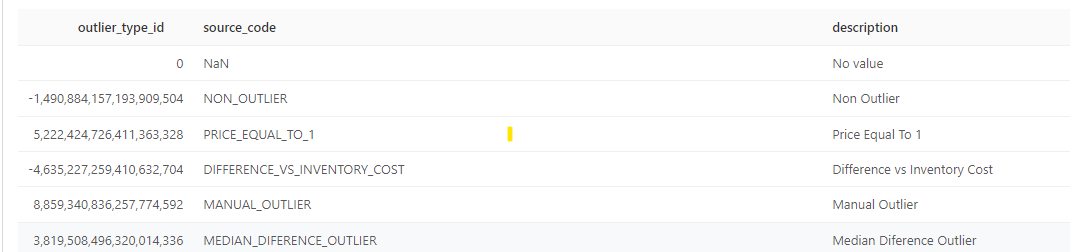